# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

lien actualisé pour accéder aux données Réseau Sentinellle: [syndrome_varicelle](http://www.sentiweb.fr/france/fr/?page=table) Nous faisons une copie locale des données pour nous protéger contre une éventuelle disparition ou modification du serveur du Réseau Sentinelles.  
Les données seront téléchargées uniquement si la cope locale n'existe pas.

In [4]:
data_df = 'epidemio_varicelle.cvs'

import os.path
import urllib.request
if not os.path.exists(data_df):
    urllib.request.urlretrieve(data_url, data_df)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):
    
| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [5]:
raw_data = pd.read_csv(data_df, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202116          7   5472     2908    8036       8           4   
1     202115          7  11536     7684   15388      17          11   
2     202114          7  11197     7994   14400      17          12   
3     202113          7   9714     6289   13139      15          10   
4     202112          7  11520     8415   14625      17          12   
5     202111          7   9386     6678   12094      14          10   
6     202110          7   9056     6452   11660      14          10   
7     202109          7  10988     7938   14038      17          12   
8     202108          7  11281     8361   14201      17          13   
9     202107          7  13561    10315   16807      21          16   
10    202106          7  13401     9810   16992      20          15   
11    202105          7  12210     8988   15432      18          13   
12    202104          7  12026     8826   15226      18          13   
13    202103          7   8913     6375   11451      13           9   
14    202102          7   7795     5430   10160      12           8   
15    202101          7  10525     7750   13300      16          12   
16    202053          7  11978     8406   15550      18          13   
17    202052          7  12012     8285   15739      18          12   
18    202051          7  10564     7574   13554      16          11   
19    202050          7   7063     4744    9382      11           7   
20    202049          7   5026     3145    6907       8           5   
21    202048          7   6683     4312    9054      10           6   
22    202047          7   4999     2963    7035       8           5   
23    202046          7   3752     1963    5541       6           3   
24    202045          7   3696     2016    5376       6           3   
25    202044          7   4391     2375    6407       7           4   
26    202043          7   4376     2505    6247       7           4   
27    202042          7   4000     1979    6021       6           3   
28    202041          7   3961     2099    5823       6           3   
29    202040          7   2078      675    3481       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1556  199126          7  17608    11304   23912      31          20   
1557  199125          7  16169    10700   21638      28          18   
1558  199124          7  16171    10071   22271      28          17   
1559  199123          7  11947     7671   16223      21          13   
1560  199122          7  15452     9953   20951      27          17   
1561  199121          7  14903     8975   20831      26          16   
1562  199120          7  19053    12742   25364      34          23   
1563  199119          7  16739    11246   22232      29          19   
1564  199118          7  21385    13882   28888      38          25   
1565  199117          7  13462     8877   18047      24          16   
1566  199116          7  14857    10068   19646      26          18   
1567  199115          7  13975     9781   18169      25          18   
1568  199114          7  12265     7684   16846      22          14   
1569  199113          7   9567     6041   13093      17          11   
1570  199112          7  10864     7331   14397      19          13   
1571  199111          7  15574    11184   19964      27          19   
1572  199110          7  16643    11372   21914      29          20   
1573  199109          7  13741     8780   18702      24          15   
1574  199108          7  13289     8813   17765      23          15   
1575  199107          7  12337     8077   16597      22          15   
1576  199106          7  10877     7013   14741      19          12   
1577  199105          7  10442     6544   14340      18          11   
1578  199104          7   7913     4563   11263      14           8   
1579  199103          7  15387    10484   20290      27          18   
1580  199102          7  16277  

In [ ]:
Y a-t-il des points manquants dans ce jeux de données ? Non !

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [10]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeux de données. Ceci en fait une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans le sens chronologique.

In [11]:
sorted_data = raw_data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations que nous avions supprimées !

In [13]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

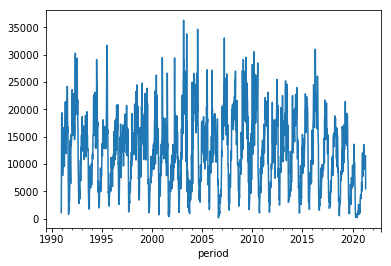

In [14]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

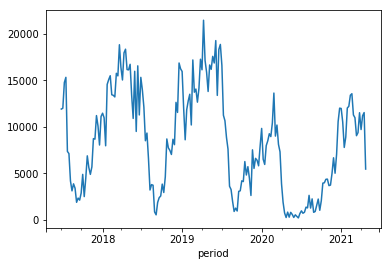

In [15]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en fin d'hiver / début de printemps, à cheval entre deux années civiles, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année  𝑁  au 1er septembre de l'année  𝑁+1 .

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence: à la place du 1er août de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er août.

Comme l'incidence de la varicelle est très faible en été, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [17]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

first_september_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [ ]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

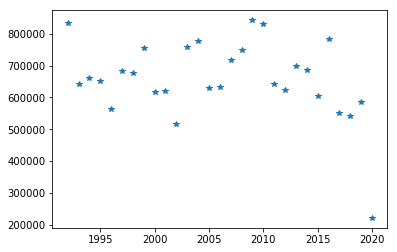

In [29]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [30]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que le nombre de cas de varicelle est assez constant d'une année sur l'autre (entre 1 et 1,5% de la population française).
Seule l'année 2020 se distingue par son très faible nombre de cas de varicelle.


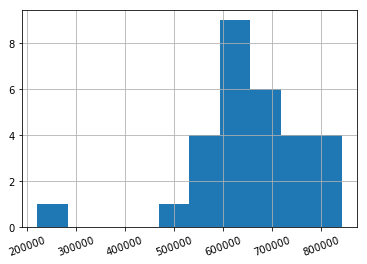

In [31]:
yearly_incidence.hist(xrot=20)